In [1]:
# import required libraries

import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dir_path = "/content/drive/MyDrive/Colab"
file_path = dir_path + "/food-images.zip"
!unzip $file_path

In [10]:
# create dataset from directory containing sample images
# directory is structured as class1/ class2/ ..
# each containing sample images for that class

train_data, valid_data = keras.utils.image_dataset_from_directory(
    "food-images",
    labels = "inferred",
    class_names=('burger', 'cake', 'juice', 'noodles', 'pizza'),
    image_size=(224,224),
    batch_size=32,
    validation_split=0.2,
    subset="both",
    seed=1337)

Found 1479 files belonging to 5 classes.
Using 1184 files for training.
Using 295 files for validation.


In [11]:
# load pre-trained model from keras-hub
import keras_hub
classifier = keras_hub.models.ImageClassifier.from_preset("resnet_v2_50_imagenet", num_classes=5)

100%|██████████| 840/840 [00:00<00:00, 1.09MB/s]


100%|██████████| 3.54k/3.54k [00:00<00:00, 5.52MB/s]


100%|██████████| 98.1M/98.1M [00:01<00:00, 61.0MB/s]


100%|██████████| 90.2M/90.2M [00:01<00:00, 72.8MB/s]


In [12]:
# input images are preprocessed and resized
classifier.preprocessor.image_size = (224,224)

In [13]:
# compile model
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
# train model
classifier.fit(train_data, validation_data=valid_data, epochs=3)

Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 1122s 29s/step - accuracy: 0.4141 - loss: 2.7611 - val_accuracy: 0.4915 - val_loss: 1.6094
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 1088s 29s/step - accuracy: 0.4777 - loss: 1.6033 - val_accuracy: 0.5051 - val_loss: 1.6094
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 1089s 29s/step - accuracy: 0.4926 - loss: 1.6094 - val_accuracy: 0.5119 - val_loss: 1.6094


In [15]:
# save model parameters
classifier.save_to_preset("/content/drive/MyDrive/Colab/food-classifier-model")

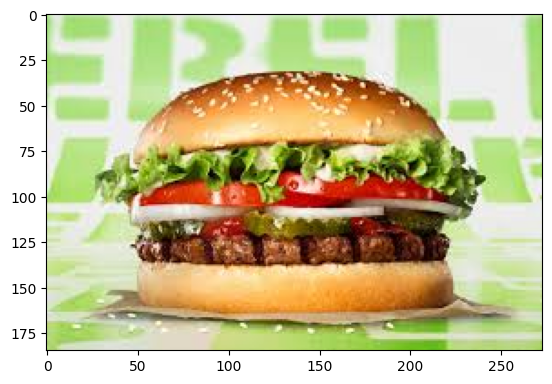

In [57]:
# try model on new sample image
from matplotlib import image
img_file = "/content/test-sample/8.jpg"
img = image.imread(img_file)
plt.imshow(img)

In [58]:
# run prediction on sample test
predictions = classifier.predict(np.array([img]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


In [22]:
class_labels = ['burger', 'cake', 'juice', 'noodles', 'pizza']

In [59]:
class_labels[np.argmax(predictions[0])]

'burger'